<div>
    <img src="https://scitools.org.uk/cartopy/docs/latest/_static/cartopy.png"><br>
</div>

# Mapping with Cartopy

Earth Science is, shockingly, about the Earth, and often involves making maps. Thankfully, we don't have to 
continue to draw maps by hand, and you can even consider putting away your colouring pencils (but keep them 
close at hand, just in case).

There are many tools out there for making maps. For more advanced mapping, and interactive mapping you may
want to consider working with GIS (Geographic Information System) tools like [QGIS](https://www.qgis.org/en/site/). 
We won't cover GIS here, and in fact SGEES has a whole [Masters program dedicated to GIS](https://www.wgtn.ac.nz/explore/postgraduate-programmes/master-of-geographic-information-science/overview), as well as specific courses that you could take, like [GISC420](https://www.wgtn.ac.nz/courses/gisc/420/2021/offering?crn=33043).

In this notebook we will cover some basic map-making using the Python package [cartopy](https://scitools.org.uk/cartopy/docs/latest/#).
This is the new de-facto mapping package in Python, however it remains under development (as most open-source
scientific software does!), so you can expect that some features will continue to be added. For what we show though, it does the job well. However it is lacking some key things - like being able to plot topography simply, so we will skip that. The old standard mapping project that is still going strong it [GMT](https://www.generic-mapping-tools.org/), which is fully-featured, but until [pyGMT](https://github.com/GenericMappingTools/pygmt) is developed, requires you to learn shell-programming, which we aren't going to teach you this year.

In this notebook we will cover:
1. Basic map making;
2. Changing map projections;
3. Adding labels and map adornments (grids, north arrow, scale);
4. Plotting some geospatial data.

We will then advance on to making some more advanced maps with some fun datasets.

---

## Basic Map Making

To start off we will make a map of the world with coastlines. You should be familiar with using matplotlib by now,
so a lot of the starting code will be familiar to you.

First we will initialize the matplotlib notebook plotting widget:

In [1]:
%matplotlib widget

Then we can import the packages we need:

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs   # This is the Cartopy Co-ordinate Reference System that handles projections

Now we can make a new figure and axis using similar syntax to before, but we will specify the projection. 
To make this more obvious, we will break figure and axis creation call down into two steps. We could do this
in one go, but the call looks like:
```python
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
```
which I think is pretty ugly.

it is totally up to you which form you use, but I think this was is a little clearer.

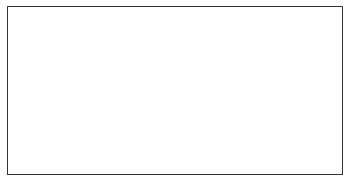

In [2]:
fig = plt.figure()
ax = fig.add_subplot(projection=ccrs.PlateCarree())

This just looks like a blank figure... And it is, all that we have done is make a new `Axes` object with
a particular projection.  If you are interested you can check out some of the other projections that matplotlib
supports natively [here](https://matplotlib.org/3.3.3/gallery/index.html#pie-and-polar-charts). 
You can even plot stereonets using [mplstereonet](https://mplstereonet.readthedocs.io/en/latest/index.html)!

The [PlateCarree](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html#platecarree) projection is a 
standard [equirectangular projection](https://en.wikipedia.org/wiki/Equirectangular_projection), and is often
how latitude and longitude are defined. It doesn't look great though, lets plot the coastline to show that.

To add the coastline we just make a single, simple call (we create a new figure and axes everytime to get it
to show in the notebook):

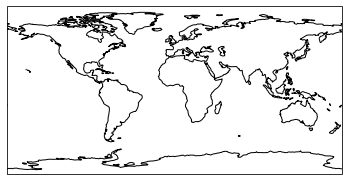

In [3]:
fig = plt.figure()
ax = fig.add_subplot(projection=ccrs.PlateCarree())

# Add the coastlines!
ax.coastlines()

Yay! We made a map, phew, job done, hometime?

Not so fast. We can make much better maps than this! NZ is a little small in this global map, lets make a local map focused on us.

To make a local map we have to set the extent of the map by setting the minimum latitude and longitude and maximum latitude and longitude using the [`set_extent` method](https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.set_extent):

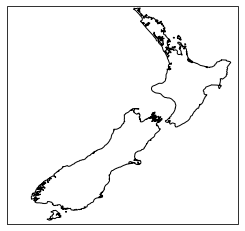

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection=ccrs.PlateCarree())

# Set the extend before calling coastlines to avoid drawing the whole world!
ax.set_extent((165, 179, -47.5, -34.3), crs=ccrs.PlateCarree())  # We have to tell it what coordinate system our extent is in.

# Add the coastlines to show where we are
ax.coastlines()

---
## Projections

That looks a little squashed to me. This "squashing" is an artefact of the projection we are using.

Lets try using a different projection that might be a little more suitable. [Mercator](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html#mercator) is a common
projection to use, but it has its own problems too. Lets see how our map looks in a Mercator projection.

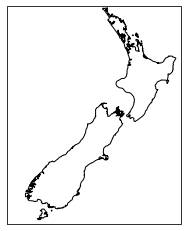

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection=ccrs.Mercator())

# We are still setting the extent in PlateCarree
ax.set_extent((165, 179, -47.5, -34.3), crs=ccrs.PlateCarree())

# Add the coastlines to show where we are
ax.coastlines()

That looks a lot more reasonable.

Now it is your turn - try making a map of NZ using the [Albers Equal Area projection](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html#albersequalarea). 

If you go to the link above you will see that you can change some options - try changing the `central_longitude` to 170 and the `standard_parallels` to `(-30, -50)` see how that changes your figure. The defaults are designed for plotting the contiguous USA, so they need to be changed to suit NZ!

In [6]:
# Your answer here!

Feel free to play around with other projections - there is a lot of information out there about map projections (including [this wikipedia page](https://en.wikipedia.org/wiki/Map_projection) and [this page on LINZ](https://www.linz.govt.nz/data/geodetic-system/datums-projections-and-heights/understanding-datums-projections/using-maps)), but the main thing for our mapping purposes is that you should chose a projection that minimises distortions across the map. 

Ideally for local maps a set distance would end up as the same length on our map no matter where on our map or what orientation we measure. For us in New Zealand the [NZTM (New Zealand Transverse Mercator)](https://www.linz.govt.nz/data/geodetic-system/datums-projections-and-heights/projections/new-zealand-transverse-mercator-2000) is probably the most useful projection. We can define this projection using the values from LINZ and use it for the rest of our maps:

/home/calumch/miniconda3/envs/conda_37/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The default value for the *approx* keyword argument to TransverseMercator will change from True to False after 0.18.
  """


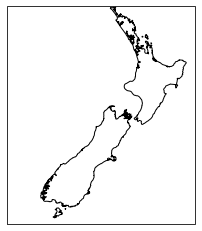

In [7]:
globe = ccrs.Globe(semimajor_axis=6378137, inverse_flattening=298.257222101)
NZTM = ccrs.TransverseMercator(
    central_longitude=173.0, central_latitude=0.0,
    false_easting=1600000, false_northing=10000000,
    scale_factor=0.9996, globe=globe)

fig = plt.figure()
ax = fig.add_subplot(projection=NZTM)

# We are still setting the extent in PlateCarree
ax.set_extent((165, 179, -47.5, -34.3), crs=ccrs.PlateCarree())

# Add the coastlines to show where we are
ax.coastlines()

Now that you know about projections, try making a map in NZTM projection focused on Fiordland. I don't think Slartibartfast created these Fiords, but they are certaintly pretty cool.

You might find that your Fiords don't look as intricate as you might expect. This is because we are plotting a fairly low resolution version of the coastline dataset. Check out the [coastline documentation](https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.coastlines) and try changing your call to `ax.coastlines()` to `ax.coastlines(resolution="10m")` to get higher-resolution coasts. You can change the colour too if you want!

In [8]:
# Your map of Fiordland here

### Adding colour

Black and white line maps are a bit dull - lets add some colour. To be able to fill in the land one colour and the oceans another we need to know which is which. Thankfully Cartopy has an interface for this called the [Feature interface](https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html). Cartopy has two data sources baked in: Natural Earth and GSHHS - the GSHHS coastlines offer greater accuracy for NZ so we will use them.

To use the Feature interface we need to load the relevent module:

In [9]:
import cartopy.feature as cfeature

Lets start by making a map and setting the background colour to blue (for oceans) and adding the land on top filled in green (this might take a while to load the first time - the coastlines are much higher resolution now):

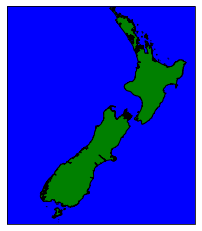

In [10]:
fig = plt.figure()
ax = fig.add_subplot(projection=NZTM)

# We are still setting the extent in PlateCarree
ax.set_extent((165, 179, -47.5, -34.3), crs=ccrs.PlateCarree())

ax.set_facecolor("blue")  # This is a standard matplotlib call to set the background colour of a plot.

# We first make a new object (shape) that is the coastline, we can set the scale to
# "l", "i", "h" or "f" for low, intermediate, high and full respectively. Higher resolutions take longer to plot!
coast = cfeature.GSHHSFeature(
    scale="h", levels=[1], facecolor="green", edgecolor="black")
# Finally we add the feature to out map
ax.add_feature(coast)

On my screen those colours are quite painful! Try changing the colours in the above code and re-running. Check out the [matplotlib colours page](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) for a table of named colours that you could try for `ax.set_facecolor` and `facecolor` in the `cfeature.GSHHSfeature` call.

---
## Adding information to our maps

All good maps should have a scale-bar, north arrow and some axis labels. While axis labels are nice and easy with Caropy, Cartopy currently lacks an in-built way to add a scale bar or north arrow (gah!). I have written some code for this and provided it in the helpers module.  If you go on with making maps with Cartopy later in the course **remember that you need to get the code from the helpers folder.**

### Adding Gridlines

Lets start off simply with a map focused on Cook Strait and putting some grid-labels on it - we use the `ax.gridlines` call, which has a few arguments that you can see in the [gridlines docs](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.gridlines):

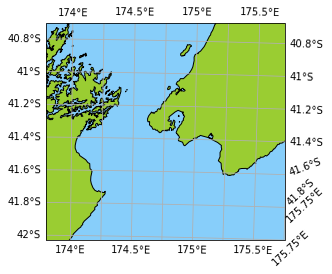

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection=NZTM)
ax.set_extent((173.8, 175.7, -42.0, -40.7), crs=ccrs.PlateCarree())
ax.set_facecolor("lightskyblue")
coast = cfeature.GSHHSFeature(
    scale="h", levels=[1], facecolor="yellowgreen", edgecolor="black")
ax.add_feature(coast)

# Add the gridlines and labels
ax.gridlines(draw_labels=True)

That fairly nicely shows that the NZTM projection is slightly rotated relative to the PlateCarree projection here. You'll also see that the longitude labels are slightly oddly positioned. This is done automatically to avoid labels overlapping. We can control which lines are drawn by setting `ylocs` or `xlocs` for the `ax.gridlines` call:

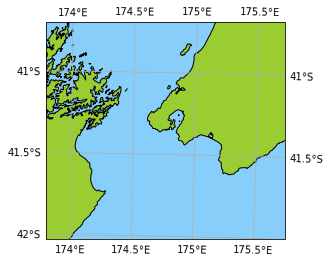

In [12]:
fig = plt.figure()
ax = fig.add_subplot(projection=NZTM)
ax.set_extent((173.8, 175.7, -42.0, -40.7), crs=ccrs.PlateCarree())
ax.set_facecolor("lightskyblue")
coast = cfeature.GSHHSFeature(
    scale="h", levels=[1], facecolor="yellowgreen", edgecolor="black")
ax.add_feature(coast)

# Add the gridlines and labels, specifying that we only want labels every half a degree
ax.gridlines(
    draw_labels=True, 
    xlocs=[174, 174.5, 175, 175.5], 
    ylocs=[-42, -41.5, -41])

Make your own map of Fiordland with ticks every .5 degrees in longitude and .25 degree in latitude.

In [13]:
# Your map here!

### Adding a north arrow and scale bar

To do this we need to use some custom code. You don't need to know how this code works, but you will need it if you make makes outside of this notebook and want a scale bar and north arrow!  The code is located in `helpers/map_annotations.py`. We can import from there so we don't need to re-write the code.

In [14]:
from helpers.map_annotations import north_arrow, scale_bar

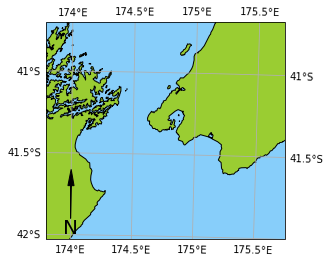

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection=NZTM)
ax.set_extent((173.8, 175.7, -42.0, -40.7), crs=ccrs.PlateCarree())
ax.set_facecolor("lightskyblue")
coast = cfeature.GSHHSFeature(
    scale="h", levels=[1], facecolor="yellowgreen", edgecolor="black")
ax.add_feature(coast)
ax.gridlines(
    draw_labels=True, 
    xlocs=[174, 174.5, 175, 175.5], 
    ylocs=[-42, -41.5, -41])

# Make a North arrow starting from x and y, and of length arrow_length - we have 
# to tell it what coordinate reference system these coordinates are in!
north_arrow(ax, x=174, y=-41.9, arrow_length=.2, transform=ccrs.PlateCarree())

Now we have our north arrow, lets add a scale bar as well:

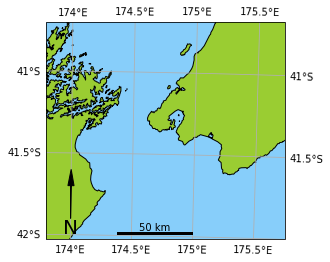

In [16]:
fig = plt.figure()
ax = fig.add_subplot(projection=NZTM)
ax.set_extent((173.8, 175.7, -42.0, -40.7), crs=ccrs.PlateCarree())
ax.set_facecolor("lightskyblue")
coast = cfeature.GSHHSFeature(
    scale="h", levels=[1], facecolor="yellowgreen", edgecolor="black")
ax.add_feature(coast)
ax.gridlines(
    draw_labels=True, 
    xlocs=[174, 174.5, 175, 175.5], 
    ylocs=[-42, -41.5, -41])
north_arrow(ax, x=174, y=-41.9, arrow_length=.2, transform=ccrs.PlateCarree())

# We have to provide a position in axes co-ordinates (from 0 to 1) and length in km.
scale_bar(ax, location=(0.3, 0.03), length=50)

Now it is your turn again, add a scale bar and north arrow to your Fiordland map!

In [17]:
# Your map here.

---
## Plotting data

Yay, we can make simple maps, now lets plot some data!

I'm going to grab an earthquake catalogue from GeoNet and play with that - we will use the same downloading tool we used before to get the csv. I have added this into the `helpers/get_data.py` file, so we can import it here without having to re-write the function:

In [18]:
from helpers.get_data import get_geonet_quakes
# We also need to import datetime to specify start and end times for the download
import datetime

In [19]:
earthquakes = get_geonet_quakes(
    min_latitude=-42.1, max_latitude=-40.6, min_longitude=173.7, max_longitude=175.8,
    start_time=datetime.datetime(2010, 1, 1), end_time=datetime.datetime(2021, 2, 28))
print(f"You downloaded {len(earthquakes)} events")

Using query: https://quakesearch.geonet.org.nz/csv?bbox=173.7,-42.1,175.8,-40.6&minmag=0.0&maxmag=9.0&mindepth=0.0&maxdepth=500.0&startdate=2010-01-01T00:00:00&enddate=2021-02-28T00:00:00
You downloaded 38129 events


To plot those we use standard matplotlib syntax, but we do have to specify the co-ordinate system that the data are in. Again, these will be in latitude and longitude, so PlateCarree:

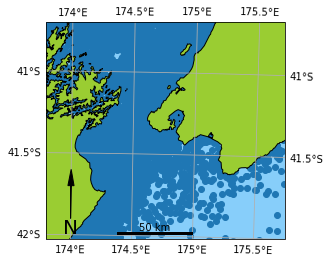

In [20]:
fig = plt.figure()
ax = fig.add_subplot(projection=NZTM)
ax.set_extent((173.8, 175.7, -42.0, -40.7), crs=ccrs.PlateCarree())
ax.set_facecolor("lightskyblue")
coast = cfeature.GSHHSFeature(
    scale="h", levels=[1], facecolor="yellowgreen", edgecolor="black")
ax.add_feature(coast)
ax.gridlines(
    draw_labels=True, 
    xlocs=[174, 174.5, 175, 175.5], 
    ylocs=[-42, -41.5, -41])
north_arrow(ax, x=174, y=-41.9, arrow_length=.2, transform=ccrs.PlateCarree())
scale_bar(ax, location=(0.3, 0.03), length=50)

# A simple call to the scatter method will work here - we just have to add the transform.
ax.scatter(earthquakes.longitude, earthquakes.latitude, transform=ccrs.PlateCarree())

When I run this, I get a lot of blue dots, all overlapping, and the land covers them up! That isn't much good!

The main issues here are:
1. The land is plotted "on-top of" the scatter - we want our data on top!
2. There are so many dots we can't see the dots for the dots!

We can solves those by:
1. Changing the `zorder` - this controls the order that objects are rendered in the plot, if we increase the zorder it will bring things to the top
2. We can change the styling of the dots - we will actually scale them by magnitude so the small magnitude earthquakes plot very small

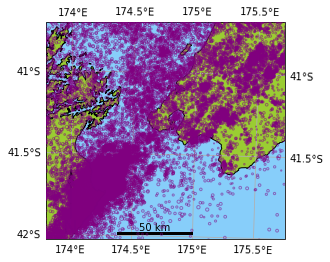

In [21]:
fig = plt.figure()
ax = fig.add_subplot(projection=NZTM)
ax.set_extent((173.8, 175.7, -42.0, -40.7), crs=ccrs.PlateCarree())
ax.set_facecolor("lightskyblue")
coast = cfeature.GSHHSFeature(
    scale="h", levels=[1], facecolor="yellowgreen", edgecolor="black")
ax.add_feature(coast)
ax.gridlines(
    draw_labels=True, 
    xlocs=[174, 174.5, 175, 175.5], 
    ylocs=[-42, -41.5, -41])
north_arrow(ax, x=174, y=-41.9, arrow_length=.2, transform=ccrs.PlateCarree())
scale_bar(ax, location=(0.3, 0.03), length=50)

# we can pass a vector of sizes, using the magnitude column
ax.scatter(
    earthquakes.longitude, earthquakes.latitude, 
    s=earthquakes.magnitude ** 2,  # Set the size to be the square of magnitude
    zorder=100, # Set a high zorder to get them to plot on top
    facecolor="none", # Make them unfilled circles
    edgecolor="purple", # with a purple outline
    alpha=0.5, # Make them slightly transparent
    transform=ccrs.PlateCarree())

This is better (you can start to see what might be faults in North Island, and the mass of Cook Strait and Kaikoura aftershocks), but I'm sure you can do better!

Get a suitable catalogue for your Fiordland region and make a prettier plot of earthquake locations there.

In [22]:
# Your map here

Lets add some more useful information by plotting our locations coloured by depth. To do this we can make use of [matplotlib colormaps](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) - there is a lot of colormap bias flying around the twittersphere - the main rule is to steer clear of rainbow colormaps if you can - they tend to artificially enhance relatively small variations...

I'm going to use one of my favorites here: "plasma".  To do this we add another couple of arguments to scatter, `c` to give a vector of colours (in our case just the depths), and `cmap` to define the colourmap to convert from depth to colour.

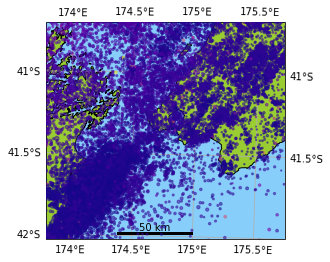

In [23]:
fig = plt.figure()
ax = fig.add_subplot(projection=NZTM)
ax.set_extent((173.8, 175.7, -42.0, -40.7), crs=ccrs.PlateCarree())
ax.set_facecolor("lightskyblue")
coast = cfeature.GSHHSFeature(
    scale="h", levels=[1], facecolor="yellowgreen", edgecolor="black")
ax.add_feature(coast)
ax.gridlines(
    draw_labels=True, 
    xlocs=[174, 174.5, 175, 175.5], 
    ylocs=[-42, -41.5, -41])
north_arrow(ax, x=174, y=-41.9, arrow_length=.2, transform=ccrs.PlateCarree())
scale_bar(ax, location=(0.3, 0.03), length=50)

# we can pass a vector of sizes, using the magnitude column
ax.scatter(
    earthquakes.longitude, earthquakes.latitude, 
    c=earthquakes.depth, cmap="plasma",
    s=earthquakes.magnitude ** 2,  # Set the size to be the square of magnitude
    zorder=100, # Set a high zorder to get them to plot on top
    alpha=0.5, # Make them slightly transparent
    transform=ccrs.PlateCarree())

Not as impressive as I had hoped - that is because a couple of really deep events are biasing the colourmap:

In [24]:
earthquakes.depth.max()

492.5

We can add a limit to our colormap using a "normalizer":

In [25]:
from matplotlib.colors import Normalize

norm = Normalize(vmin=0, vmax=50.0)  # Only use the color map between 0 and 50 km depth

### Colorbars

Now lets make use of that and add a colorbar (and a label to the colorbar).

In [27]:
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(projection=NZTM)
ax.set_extent((173.8, 175.7, -42.0, -40.7), crs=ccrs.PlateCarree())
ax.set_facecolor("white")
coast = cfeature.GSHHSFeature(
    scale="h", levels=[1], facecolor="lightgrey", edgecolor="black")
ax.add_feature(coast)
ax.gridlines(
    draw_labels=True, 
    xlocs=[174, 174.5, 175, 175.5], 
    ylocs=[-42, -41.5, -41])
north_arrow(ax, x=174, y=-41.9, arrow_length=.2, transform=ccrs.PlateCarree())
scale_bar(ax, location=(0.3, 0.03), length=50)

# we can pass a vector of sizes, using the magnitude column
colors = ax.scatter(
    earthquakes.longitude, earthquakes.latitude, 
    c=earthquakes.depth, cmap="plasma", norm=norm,
    s=earthquakes.magnitude ** 2,  # Set the size to be the square of magnitude
    zorder=9, # Set a high zorder to get them to plot on top
    alpha=0.5, # Make them slightly transparent
    rasterized=True,  # Rasterize for faster rendering
    transform=ccrs.PlateCarree())

cbar_ax = fig.colorbar(colors, ax=ax, orientation="horizontal")  # Add a colorbar
cbar_ax.set_label("Depth (km)")

FigureCanvasNbAgg()

## Legends

It is all well and good scaling by magnitude, but we can't read anything off about the magnitudes without a scale.
Matplotlib handles this with legends:

In [28]:
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(projection=NZTM)
ax.set_extent((173.8, 175.7, -42.0, -40.7), crs=ccrs.PlateCarree())
ax.set_facecolor("white")
coast = cfeature.GSHHSFeature(
    scale="h", levels=[1], facecolor="lightgrey", edgecolor="black")
ax.add_feature(coast)
ax.gridlines(
    draw_labels=True, 
    xlocs=[174, 174.5, 175, 175.5], 
    ylocs=[-42, -41.5, -41])
north_arrow(ax, x=174, y=-41.9, arrow_length=.2, transform=ccrs.PlateCarree())
scale_bar(ax, location=(0.3, 0.03), length=50)

# we can pass a vector of sizes, using the magnitude column
colors = ax.scatter(
    earthquakes.longitude, earthquakes.latitude, 
    c=earthquakes.depth, cmap="plasma", norm=norm,
    s=earthquakes.magnitude ** 2,  # Set the size to be the square of magnitude
    zorder=9, # Set a high zorder to get them to plot on top
    alpha=0.5, # Make them slightly transparent
    rasterized=True,  # Rasterize for faster rendering
    transform=ccrs.PlateCarree())

cbar_ax = fig.colorbar(colors, ax=ax, orientation="horizontal")  # Add a colorbar
cbar_ax.set_label("Depth (km)")

# Add a legend
magnitudes = [2, 3, 4, 5, 6, 7]  # Magnitudes to plot sizes for

# We can retrive the marker for that size by accessing the legend elements of the mappable
handles, labels = colors.legend_elements("sizes", num=[mag ** 2 for mag in magnitudes])

# This gives is "handles" (the plotted object) and "labels" (the text to go beside it),
# but the labels in this case are the square of the magnitudes we want, so we will just use
# the magnitudes themselves as labels.
labels = magnitudes

# If you are actually plotting at the size you want to mark, you don't have to change labels!
ax.legend(handles=handles, labels=labels, title="Magnitude")

FigureCanvasNbAgg()

Now we know how to plot points on maps, how about plotting some lines?

For example, we can make a large NZ-wide map (again) and draw a box around the region plotted in our main map to give some context:

In [29]:
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(projection=NZTM)
ax.set_extent((165, 179, -47.5, -34.3), crs=ccrs.PlateCarree())
ax.set_facecolor("white")
coast = cfeature.GSHHSFeature(
    scale="h", levels=[1], facecolor="lightgrey", edgecolor="black")
ax.add_feature(coast)
ax.gridlines(draw_labels=True)
north_arrow(ax, x=166, y=-46, arrow_length=.7, transform=ccrs.PlateCarree())
scale_bar(ax, location=(0.1, 0.03), length=300)

# We simply call ax.plot with the transform specified
ax.plot(
    (173.8, 175.7, 175.7, 173.8, 173.8),
    (-42.0, -42.0, -40.7, -40.7, -42.0),
    transform=ccrs.PlateCarree())

FigureCanvasNbAgg()

Now it is your turn - show the region that you have been plotting on an NZ-wide map. Hopefully you can see how this could be helpful for making figures for your projects...?

In [30]:
# Your NZ-wide map

---
## Making a final multi-panel figure

It might be nice is if we could have that NZ-wide map as a wee inset to our main figure eh?

Lets have a go.

In [31]:
# I'm going to set the region so that the region plotted and the box are the same
region = (173.8, 175.7, -42.0, -40.7)

fig = plt.figure(figsize=(6, 8))

# We can specify where the axes should be within our figure canvas 
# I'm going to put this at the the bottom right
ax = fig.add_axes(
    [0.15, 0.05, 0.78, 0.9],  # This is origin x, origin y, x length, y length
    projection=NZTM)

ax.set_extent(region, crs=ccrs.PlateCarree())
ax.set_facecolor("white")
coast = cfeature.GSHHSFeature(
    scale="h", levels=[1], facecolor="lightgrey", edgecolor="black")
ax.add_feature(coast)
ax.gridlines(
    draw_labels=True, 
    xlocs=[174, 174.5, 175, 175.5], 
    ylocs=[-42, -41.5, -41])
north_arrow(ax, x=174, y=-41.9, arrow_length=.2, transform=ccrs.PlateCarree())
scale_bar(ax, location=(0.3, 0.03), length=50)

# we can pass a vector of sizes, using the magnitude column
colors = ax.scatter(
    earthquakes.longitude, earthquakes.latitude, 
    c=earthquakes.depth, cmap="plasma", norm=norm,
    s=earthquakes.magnitude ** 2,  # Set the size to be the square of magnitude
    zorder=9, # Set a high zorder to get them to plot on top
    alpha=0.5, # Make them slightly transparent
    rasterized=True,  # Rasterize for faster rendering
    transform=ccrs.PlateCarree())

cbar_ax = fig.colorbar(colors, ax=ax, orientation="horizontal")  # Add a colorbar
cbar_ax.set_label("Depth (km)")
# Add a legend
magnitudes = [2, 3, 4, 5, 6, 7]  # Magnitudes to plot sizes for
# We can retrive the marker for that size by accessing the legend elements of the mappable
# Note that we plotted magnitude squared, so we have to get the elements at the magnitude squared
handles, _ = colors.legend_elements("sizes", num=[mag ** 2 for mag in magnitudes])
ax.legend(handles=handles, labels=magnitudes, title="Magnitude", framealpha=1.0)

# now add the inset:
inset_ax = fig.add_axes(
    [0.05, 0.7, 0.25, 0.25],
    projection=NZTM)
inset_ax.set_extent((165, 179, -47.5, -34.3), crs=ccrs.PlateCarree())
inset_ax.set_facecolor("white")
coast = cfeature.GSHHSFeature(
    scale="h", levels=[1], facecolor="lightgrey", edgecolor="black")
inset_ax.add_feature(coast)

inset_ax.plot(
    (region[0], region[1], region[1], region[0], region[0]),
    (region[2], region[2], region[3], region[3], region[2]),
    c="red", transform=ccrs.PlateCarree())

FigureCanvasNbAgg()

Bonus points to anyone who wants to make a function that takes a region (minimum latitude, minimum longitude, maximum latitude, maximum longitude) and start and end time as arguments and:
1. Downloads the relevent earthquake catalogue from GeoNet
2. Makes a pretty plot (maybe prettier than mine?!)

For the GPHS445 students - that kind of map would be super helpful for your Earthquake Watch!

In [32]:
# Your function here, if you want.

---
## Saving figures

You should know this by now, but just in case: you can save figures from matplotlib to many formats, including `pdf`, `eps`, `png`, `jpg` and `svg`. Saving figures as `svg` (scalar vector graphics) can be really handy - you can then load the figures in something like [inkscape](https://inkscape.org/) and add anything else you want or tweak elements.

Saving is as simple as:
```python
fig.savefig(filename)
```

matplotlib will work out what format to save to based on the extension you give for your filename, for example if I wrote:
```python
fig.savefig("My_super_cool_map.eps")
```
I would get an eps (encapsulated postscript) file.

Thats all for this notebook - we will move on to some more advanced plotted of geographic data next.